In [1]:
import pandas as pd
import numpy as np
import os
# from sage.symbolic.substitution_map import make_map
#import sympy as sp
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import graph_objects as go
import plotly.express as px
from IPython.display import Image
import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'grid.color':'#D5D5D5',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': '#FEFCFB',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

# Pilastro
## Progetto e verifica agli SLU

In [2]:
fyk = 450
gammas = 1.15
fyd = round(fyk/gammas, 2)

fck = 25
gammac = 1.5
alphacc = .85
fcd = round(alphacc*fck/gammac, 2)

In [3]:
fyd

391.3

In [4]:
fcd

14.17

In [5]:
NEd_slu = 1882 * 10**3 #N

In [6]:
Asmin = .10 * NEd_slu/fyd
Asmin

480.96089956555073

In [7]:
Acmin = .9 * NEd_slu/fcd
Acmin

119534.22724064926

In [8]:
bmin = sqrt(Acmin)
bmin

345.737222816186

Si sceglie 
$$ l = 350\,mm$$

In [9]:
b = 350
h=b
Ac = b*h
Ac

122500

In [10]:
.003* Ac

367.5

In [11]:
Asmin > .003 * Ac

True

In [12]:
Asmax = 0.04*Ac
Asmax

4900.0

In [13]:
def area(diam, num):
    return num*pi*diam**2 /4

In [14]:
#area minima 4 Phi 12mm
N(area(12, 4))

452.389342116930

In [15]:
Phi_l = 14
As = N(area(Phi_l, 4))

In [16]:
NRd = Ac*fcd + As*fyd #
NRd > NEd_slu

True

In [17]:
NRd/10**3

1976.76882024854

In [18]:
smax = min(12*Phi_l, 250)
smax

168

In [19]:
Phi_st_min = max(Phi_l/4, 6)
Phi_st_min

6

In [20]:
#lunghezze interassi pilastro dall'alto verso il basso
l1 = 2.85*1000 #mm
l2 = 3.10*1000 #mm
l3 = 3.5*1000 #mm
l4 = 2.75*1000 #mm

In [21]:
l = [l1, l2, l3, l4]

In [22]:
ss = [l1, l1+l2, l1+l2+l3, l1+l2+l3+l4]
ltot = ss[-1]
ltot

12200.0

In [23]:
e = max(max(l)/200, 20)
e

20

In [24]:
NEd = NEd_slu
MEd = NEd*e
MEd/10**6

37.64

---
## Verifica di stabilità (NTC 2018)
Assumendo, a favore di sicurezza, le condizioni di vincolo del pilastro di tipo appoggio - appoggio si può calcolare la snellezza dell'elemento e confrontarla con la snellezza limite. Con questa ipotesi si ha
$$
l_0 = l
$$ 
dove $l$ è l'altezza di interpiano.

In [25]:
#momento di inerzia della sezione di cls non fessurata
J = b*h**3 /12
J

1250520833.3333333

In [26]:
#raggio giratore di inerzia
rho = sqrt(J/(b*h)) * np.ones(len(l))
rho

array([101.036297108184, 101.036297108184, 101.036297108184,
       101.036297108184], dtype=object)

Ipotizzando le condizioni di vincolo come una trave appoggiata 
$$
l_0 = l
$$

In [27]:
l0 = l
mylambda = l0/rho
Matrix(mylambda)

Matrix([
[28.2076845804074],
[30.6820428769344],
[34.6410161513775],
[27.2179412617966]])

In [28]:
lambdalim = round(25/(sqrt(NEd/(b*h*fcd))),2)
lambdalim

24.01

In [29]:
l.index(max(l))

2

In [30]:
Matrix(mylambda < lambdalim)

Matrix([
[False],
[False],
[False],
[False]])

---
# Colonna Modello
Plot

In [43]:
# chi = np.array([0,1.61453*10**(-4), 2.65324*10**(-3), 2.4567*10**(-2)])
chi = np.array([0,7.76098*10**(-5), 1.18845*10**(-3), 0.0227654])

M = np.array([0,17.5083, 237.202, 242.397])

chiN = np.array([
0,
6.66448*10**-3,
7.855*10**-3,
0.0102693])

MN = np.array([
0,
182.28,
203.38,
205.70])

In [44]:
NEd=1882 #kN
e0 = 20*10**-3  #m
ea = 8.75*10**-3  #m
e2 = chi*3.5**2/10

In [45]:
#Momenti di primo e secondo ordine
M1 = NEd*(e0+ea)
M1 #kNm

54.1075

In [46]:
M2 = NEd*e2
M2

array([ 0.        ,  0.17892551,  2.73991205, 52.48449143])

[]

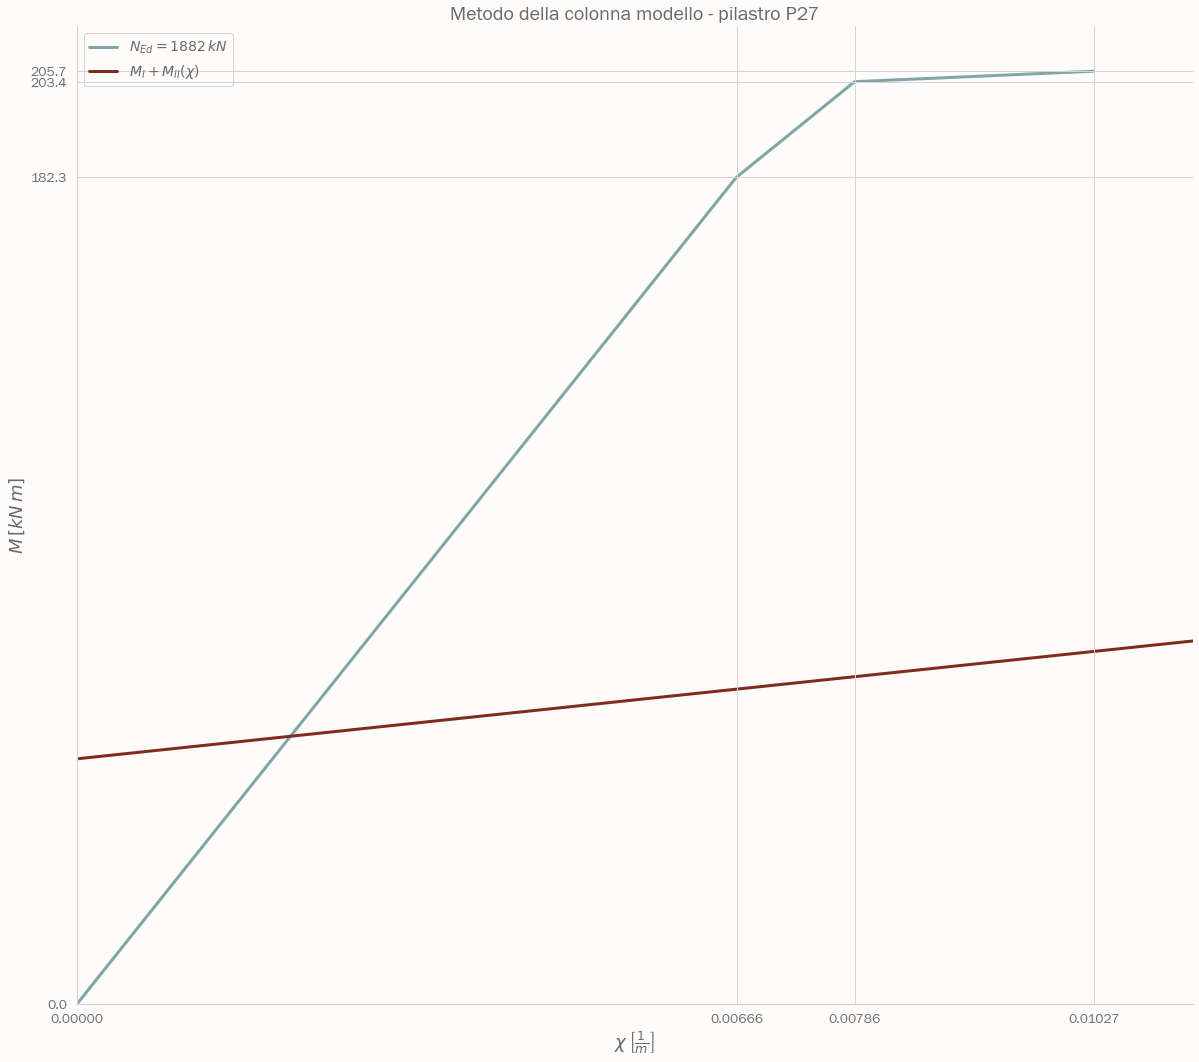

In [53]:
fig, ax = plt.subplots(figsize=(20,18))
# plt.plot(chi, M, color='#7FA5A5', linewidth=3, label=r'$N_{Ed}=0$')
plt.plot(chiN, MN,color='#7FA5A5', linewidth='3', label=r'$N_{Ed} = 1882\,kN$')
plt.plot(chi, M1*np.ones(len(chi))+M2, label=r'$M_I + M_{II}(\chi)$', linewidth=3, color='#802B1D')
ax.set_xlim(min(chiN), max(chiN)+10**-3)
ax.set_ylim(0,max(MN)+10)
plt.xticks([0,
6.66448*10**-3,
7.855*10**-3,
0.0102693], fontsize='14', )
plt.yticks([0,182.28,
203.38,
205.70], fontsize='14')
plt.grid()
plt.title('Metodo della colonna modello - pilastro P27')
plt.legend(loc=0, fontsize=14)
plt.ylabel(r'$M\,[kN\,m]$')
plt.xlabel(r'$\chi\,\left[\frac{1}{m}\right]$')
plt.savefig('export/img/colonnaModello.pdf', bbox_inches='tight')
plt.plot()